# PKPD model
Example PKPD model of single substance.
<img src="figures/Jones2013_PKPD.png">
Clearance via either hepatic or renal clearance.

In [2]:
%matplotlib inline
from __future__ import print_function, division
import tellurium as te

## Model loading
Load the latest version of the model

In [6]:
import os
import Jones2013
# import Jones2013_model as sbmlmodel
import pkpd_model as sbmlmodel

r = te.loads(os.path.join(Jones2013.target_dir, '{}_{}.xml'.format(sbmlmodel.mid, sbmlmodel.version)))
r.timeCourseSelections += ['Abody']
print(r.timeCourseSelections)

['time', 'Agu', 'Aki', 'Ali', 'Alu', 'Asp', 'Ave', 'Aar', 'Are', 'D', 'DCL', 'Abody']


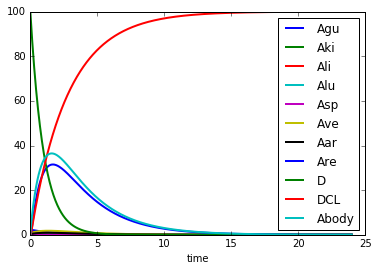

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [7]:
s = r.simulate(0,24,1001)
r.plot(s)

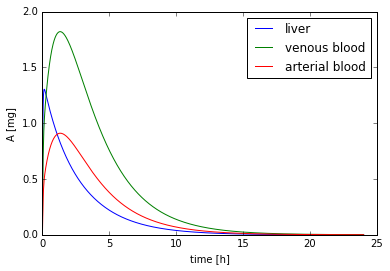

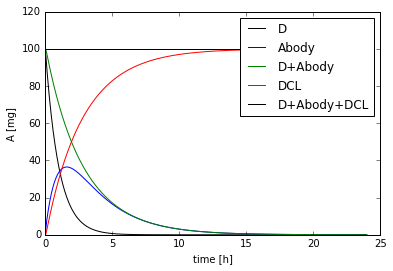

In [8]:
from matplotlib import pyplot as plt
plt.plot(s['time'], s['Ali'], label='liver')
plt.plot(s['time'], s['Ave'], label='venous blood')
plt.plot(s['time'], s['Aar'], label='arterial blood')


plt.ylabel('A [mg]')
plt.xlabel('time [h]')
plt.legend()
plt.show()

plt.plot(s['time'], s['D'], color='black', label='D')
plt.plot(s['time'], s['Abody'], label='Abody')
plt.plot(s['time'], s['D'] + s['Abody'], label='D+Abody')
plt.plot(s['time'], s['DCL'], label='DCL')
plt.plot(s['time'], s['D'] + s['Abody'] + s['DCL'], label='D+Abody+DCL', color='black')

plt.ylabel('A [mg]')
plt.xlabel('time [h]')
plt.legend()
plt.show()

## Varying the dose
Example simulations which vary the IV and the oral dose of the given substance. In the case of the IV dose the complete IV amount is immidiatly in the venous plasma compartment.

In case of oral dosing, the timecourse is strongly depending on the first drug pass, i.e. the adsorption of the substance by the gut.

An important quality control of the model is checking the mass balance within the system.

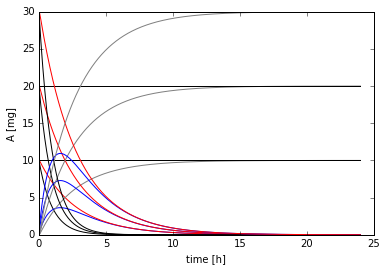

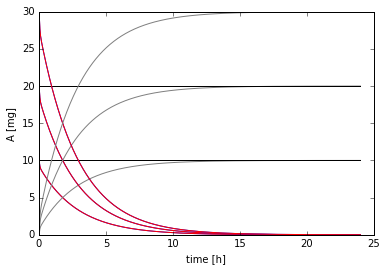

In [9]:
def plot_pkpd(s):
    """ Plot the balance of the amount. """
    plt.plot(s['time'], s['D'], color='black', label='D')
    plt.plot(s['time'], s['Abody'], color='blue', label='Abody')
    plt.plot(s['time'], s['D'] + s['Abody'], color='red', label='D+Abody')
    plt.plot(s['time'], s['DCL'], color='gray', label='DCL')
    plt.plot(s['time'], s['D'] + s['Abody'] + s['DCL'], label='D+Abody+DCL', color='black')

    plt.ylabel('A [mg]')
    plt.xlabel('time [h]')
    #plt.legend()

# Varying the oral dose
import roadrunner
from roadrunner import SelectionRecord
for dose in [0, 10, 20, 30]:
    r.setValue('init(PODOSE)', dose)  # oral dose in [mg]
    r.setValue('init(IVDOSE)', 0)  # IV dose in [mg]
    r.resetAll()
    
    s = r.simulate(0,24,1001)
    plot_pkpd(s)
plt.show()


# Varying the IV dose
for dose in [0, 10, 20, 30]:

    r.setValue('init(PODOSE)', 0)  # oral dose in [mg]
    r.setValue('init(IVDOSE)', dose)  # IV dose in [mg]
    r.resetAll()
    
    s = r.simulate(0,24,1001)
    plot_pkpd(s)
plt.show()

In [10]:
r.FVad + r.FVbo + r.FVbr + r.FVhe + r.FVmu + r.FVsk + r.FVte + r.FVrb + r.FVre

AttributeError: FVad

In [ ]:
r.FQad + r.FQbo + r.FQbr + r.FQhe + r.FQmu + r.FQsk + r.FQte + r.FQre